## 1. 텐서플로우
텐서플로우(TensorFlow)는 구글에서 개발한 오픈소스 머신러닝 라이브러리로, 수치 계산과 딥러닝 모델 구축을 위한 강력한 기능을 제공합니다. 데이터 흐름 그래프(Data Flow Graph)를 기반으로 작동하며, 노드(Node)는 연산을, 엣지(Edge)는 다차원 배열인 텐서(Tensor)를 나타냅니다. CPU, GPU, TPU 등 다양한 하드웨어에서 효율적으로 작동하며, 특히 대규모 신경망 학습과 추론에 적합합니다. 텐서플로우는 파이썬을 주로 사용하며, 직관적인 고수준 API인 Keras를 포함하고 있어 모델을 쉽고 빠르게 구축할 수 있는 환경을 제공합니다.



### 1. 텐서란?
TensorFlow에서의 텐서(Tensor)는 다차원 배열을 표현하는 핵심 데이터 구조로, 기능적으로는 파이썬의 넘파이(NumPy) 배열과 매우 유사합니다. 그러나 단순한 배열을 넘어서, 텐서는 딥러닝 모델 학습에 필수적인 자동 미분(automatic differentiation) 기능을 지원하며, 이를 통해 모델 학습 시 역전파(backpropagation)를 자동으로 처리할 수 있습니다. 텐서는 GPU나 TPU와 같은 다양한 장치에서 효율적으로 계산될 수 있도록 설계되어 있으며, 다음과 같은 기본 속성을 가집니다:

- 모양(shape): 텐서가 가지는 차원의 크기를 나타내며, 예를 들어 (3, 4)는 3행 4열의 2차원 텐서를 의미합니다.
- 자료형(data type): 텐서에 저장되는 데이터의 타입으로, float32, int32 등 다양한 타입이 있습니다.
- 저장된 장치(device): 텐서가 현재 어느 하드웨어(CPU, GPU 등)에 저장되어 있는지를 나타냅니다.

In [1]:
import tensorflow as tf

In [2]:
data =[
    [1,2],
    [3,4]
]
x = tf.constant(data)
print(x)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [4]:
data = tf.constant("String")
print(data)
# b : 바이트

tf.Tensor(b'String', shape=(), dtype=string)


In [8]:
a = tf.constant([5])
b = tf.constant([7])
c = ( a + b ).numpy()
print(c)
print(type(c))

result = c * 10
tensor = tf.convert_to_tensor(result)
print(tensor)
print(type(tensor))

[12]
<class 'numpy.ndarray'>
tf.Tensor([120], shape=(1,), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### EagerTensor
> EagerTensor는 TensorFlow에서 연산이 즉시 실행되는 방식인 Eager Execution 모드에서 생성되는 텐서입니다.
기존의 TensorFlow 1.x에서는 연산을 그래프로 정의한 후, Session을 통해 실행해야 했지만, TensorFlow 2.x부터는 즉시 실행(Eager Execution)이 기본값으로 활성화되어, Python 코드처럼 한 줄 한 줄 바로 계산 결과를 확인할 수 있게 되었습니다.

즉, 버전이 올라가면서 세션구간을 만들지 않고 일반적인 프로그램처럼 편리성이 올라갔다.

In [11]:
x = tf.constant([
    [5, 7],
    [1, 2]
])

# x와 같은 모양과 자료형을 가지지만, 값이 1인 텐서 생성
# 자료구조에서 정규화처럼 0~1사이값으로 변환하는 경우에 자주 쓰임
x_ones = tf.ones_like(x)
print(x_ones)

# x와 같은 모양을 가지되, 자료형은 float, 값은 랜덤으로 채우기
x_rand = tf.random.uniform(shape = x.shape, dtype = tf.float32)     # unifor distribution[0,1)
print(x_rand)

tf.Tensor(
[[1 1]
 [1 1]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[0.36840796 0.72227705]
 [0.87081337 0.48054934]], shape=(2, 2), dtype=float32)


### 2. 텐서의 형변환 및 차원 조작

In [13]:
tensor = tf.constant([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

print(tensor[0])
print(tensor[:,0])
print(tensor[...,-1])

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
tf.Tensor([1 5 9], shape=(3,), dtype=int32)
tf.Tensor([ 4  8 12], shape=(3,), dtype=int32)


In [14]:
tensor = tf.constant([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

# axis: 텐서를 이어 붙이기 위한 축
# 0번 축(행)을 기준으로 이어 붙이기(concat)
result = tf.concat([tensor,tensor,tensor],axis=0)
print(result)

# 1번 축(열)을 기준으로 이어 붙이기
result = tf.concat([tensor,tensor,tensor],axis=1)
print(result)

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(9, 4), dtype=int32)
tf.Tensor(
[[ 1  2  3  4  1  2  3  4  1  2  3  4]
 [ 5  6  7  8  5  6  7  8  5  6  7  8]
 [ 9 10 11 12  9 10 11 12  9 10 11 12]], shape=(3, 12), dtype=int32)


In [19]:
a = tf.constant([2])
b = tf.constant([5.0])

print(a.dtype)
print(b.dtype)

# 텐서 a를 float32 형식으로 변경한 뒤에 더하기 수행
print(tf.cast(a, tf.float32) + b)

<dtype: 'int32'>
<dtype: 'float32'>
tf.Tensor([7.], shape=(1,), dtype=float32)


In [24]:
# Variable : 텐서(변수) 만들기
a = tf.Variable([1,2,3,4,5,6,7,8])
# reshape : shpae 변환 , 복사가 아니라 View처럼 작동함
b = tf.reshape(a,(4,2))
print(b)
# tf.Tensor(
# [[1 2]
#  [3 4]
#  [5 6]
#  [7 8]], shape=(4, 2), dtype=int32)

# Variable 은 값이 변할 수 있지만 , constant는 변할 수 없음!
# Java의 const랑 let 차이

# 각 원소에 1씩 등차수열처럼 더함
a.assign_add([1,1,1,1,1,1,1,1])
print(a)
# <tf.Variable 'Variable:0' shape=(8,) dtype=int32, numpy=array([2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>
print(b)
# tf.Tensor(
# [[1 2]
#  [3 4]
#  [5 6]
#  [7 8]], shape=(4, 2), dtype=int32)

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]
 [7 8]], shape=(4, 2), dtype=int32)
<tf.Variable 'Variable:0' shape=(8,) dtype=int32, numpy=array([2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>
tf.Tensor(
[[1 2]
 [3 4]
 [5 6]
 [7 8]], shape=(4, 2), dtype=int32)


In [25]:
a = tf.random.uniform((64, 32, 3))
print(a.shape)

b = tf.transpose(a, perm=[2, 1, 0]) # 차원 자체를 교환
# (2번째 축, 1번째 축, 0번째 축)의 형태가 되도록 한다.
print(b.shape)

(64, 32, 3)
(3, 32, 64)


### 3. 텐서의 연산과 함수

In [26]:
a = tf.constant([
    [1, 2],
    [3, 4]
])
b = tf.constant([
    [5, 6],
    [7, 8]
])

In [27]:
print(a + b)
# tf.Tensor(
# [[ 6  8]
#  [10 12]], shape=(2, 2), dtype=int32)

print(a - b)
# tf.Tensor(
# [[-4 -4]
#  [-4 -4]], shape=(2, 2), dtype=int32)

print(a * b)
# tf.Tensor(
# [[ 5 12]
#  [21 32]], shape=(2, 2), dtype=int32)

print(a / b)
# tf.Tensor(
# [[0.2        0.33333333]
#  [0.42857143 0.5       ]], shape=(2, 2), dtype=float64)

print(tf.matmul(a, b))
# tf.Tensor(
# [[19 22]
#  [43 50]], shape=(2, 2), dtype=int32)

tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[-4 -4]
 [-4 -4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 5 12]
 [21 32]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[0.2        0.33333333]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float64)
tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


In [28]:
a = tf.constant([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])
print(a)

tf.Tensor(
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4), dtype=int32)


In [29]:
print(tf.reduce_mean(a)) # 전체 원소에 대한 평균
print(tf.reduce_mean(a, axis=0)) # 각 열에 대하여 평균 계산
print(tf.reduce_mean(a, axis=1)) # 각 행에 대하여 평균 계산

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor([3 4 5 6], shape=(4,), dtype=int32)
tf.Tensor([2 6], shape=(2,), dtype=int32)


In [31]:
print(tf.reduce_sum(a)) # 전체 원소에 대한 합계
print(tf.reduce_sum(a, axis=0)) # 각 열에 대하여 합계 계산
print(tf.reduce_sum(a, axis=1)) # 각 행에 대하여 합계 계산

tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor([ 6  8 10 12], shape=(4,), dtype=int32)
tf.Tensor([10 26], shape=(2,), dtype=int32)


In [32]:
print(tf.reduce_max(a)) # 전체 원소에 대한 최댓값
print(tf.reduce_max(a, axis=0)) # 각 열에 대하여 최댓값 계산
print(tf.reduce_max(a, axis=1)) # 각 행에 대하여 최댓값 계산

tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor([4 8], shape=(2,), dtype=int32)


In [33]:
print(tf.argmax(a, axis=0)) # 각 열에 대하여 최댓값의 인덱스 계산
print(tf.argmax(a, axis=1)) # 각 행에 대하여 최댓값의 인덱스 계산

tf.Tensor([1 1 1 1], shape=(4,), dtype=int64)
tf.Tensor([3 3], shape=(2,), dtype=int64)


In [34]:
print(a.shape)

# 첫 번째 축에 차원 추가
a = tf.expand_dims(a, 0)
print(a)
print(a.shape)

# 네 번째 축에 차원 추가
a = tf.expand_dims(a, 3)
print(a)
print(a.shape)

# 크기가 1인 차원 제거
a = tf.squeeze(a)
print(a)
print(a.shape)

(2, 4)
tf.Tensor(
[[[1 2 3 4]
  [5 6 7 8]]], shape=(1, 2, 4), dtype=int32)
(1, 2, 4)
tf.Tensor(
[[[[1]
   [2]
   [3]
   [4]]

  [[5]
   [6]
   [7]
   [8]]]], shape=(1, 2, 4, 1), dtype=int32)
(1, 2, 4, 1)
tf.Tensor(
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4), dtype=int32)
(2, 4)


### 4. 자동 미분과 기울기


In [36]:
# 변한다 = 수식 계산이 가능하며, grad가 가능하다.
x = tf.Variable([3.0, 4.0])
y = tf.Variable([1.0, 2.0])

In [37]:
# 진행되는 모든 연산들을 기록
with tf.GradientTape() as tape:
    z = x + y
    loss = tf.math.reduce_mean(z)
dx = tape.gradient(loss,x)  # loss가 scalar이므로 계산 가능
print(dx)

tf.Tensor([0.5 0.5], shape=(2,), dtype=float32)


tf.Tensor(
[4.53958077e-05 5.55575620e-05 6.79936937e-05 8.32130942e-05
 1.01838442e-04 1.24631609e-04 1.52524715e-04 1.86658091e-04
 2.28426653e-04 2.79536554e-04 3.42074339e-04 4.18591319e-04
 5.12206458e-04 6.26731702e-04 7.66824507e-04 9.38173215e-04
 1.14772200e-03 1.40394326e-03 1.71716676e-03 2.09997591e-03
 2.56768332e-03 3.13889855e-03 3.83620191e-03 4.68693782e-03
 5.72413978e-03 6.98759437e-03 8.52504404e-03 1.03935138e-02
 1.26607241e-02 1.54065171e-02 1.87241696e-02 2.27213903e-02
 2.75206964e-02 3.32587242e-02 4.00838615e-02 4.81513998e-02
 5.76152215e-02 6.86149280e-02 8.12573764e-02 9.55919842e-02
 1.11580066e-01 1.29060077e-01 1.47712989e-01 1.67034879e-01
 1.86326443e-01 2.04710159e-01 2.21183725e-01 2.34711795e-01
 2.44347497e-01 2.49363393e-01 2.49363393e-01 2.44347497e-01
 2.34711795e-01 2.21183725e-01 2.04710159e-01 1.86326443e-01
 1.67034879e-01 1.47712989e-01 1.29060077e-01 1.11580066e-01
 9.55919842e-02 8.12573764e-02 6.86149280e-02 5.76152215e-02
 4.81513998e-

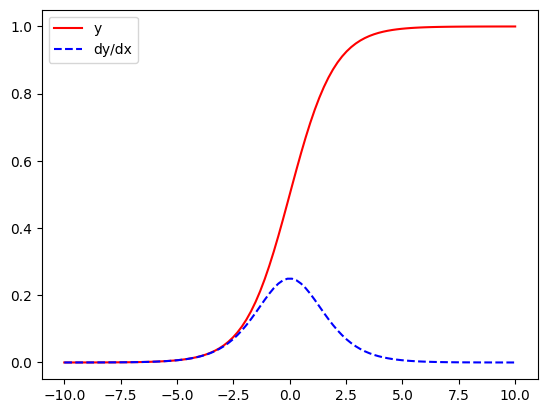

In [38]:
# -10부터 10까지 100개의 실수로 만들어줘!
# constant로 만들어
x = tf.linspace(-10, 10, 100)

with tf.GradientTape() as tape:
    # constant를 variable화 만들어줘서 연산을 볼 수 있음
    tape.watch(x) # constant이므로, watch() 함수 호출 필요
    y = tf.nn.sigmoid(x)

dx = tape.gradient(y, x)
print(dx)


import matplotlib.pyplot as plt

plt.plot(x, y, 'r', label="y")
plt.plot(x, dx, 'b--', label="dy/dx")
plt.legend()
plt.show()

## 2. 모델 만들기

In [39]:
from google.colab import files
files.upload()  # kaggle.json 업로드 창 표시

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [40]:
!kaggle datasets download pratik2901/multiclass-weather-dataset

Dataset URL: https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/91.4M [00:00<?, ?B/s]
100% 91.4M/91.4M [00:00<00:00, 1.19GB/s]


In [41]:
import os
import zipfile
import random
from shutil import copyfile, rmtree

In [43]:
zip_file = 'multiclass-weather-dataset.zip'
base_dir = './Multi-class Weather Dataset'
train_dir = './train'
test_dir = './test'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('.') # 현재 디렉토리에 압축해제

In [45]:
# 분류 디렉터리 목록
categories = ['Cloudy', 'Rain', 'Shine', 'Sunrise']

# 이미 존재하면 지워주고, 새로 만들어라!
if os.path.exists(train_dir):
    rmtree(train_dir)
if os.path.exists(test_dir):
    rmtree(test_dir)

# train, test 폴더 및 하위 카테고리 폴더 생성
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

base_dir = '/content/Multi-class Weather Dataset'

In [46]:
# 각 카테고리별 데이터 파일 나누기
for category in categories:
    category_path = os.path.join(base_dir, category)
    files = os.listdir(category_path)

    # 데이터 섞기
    random.shuffle(files)

    # 데이터 나누기 (8:2 비율)
    split_idx = int(len(files) * 0.8)
    train_files = files[:split_idx]
    test_files = files[split_idx:]

    # 파일 복사
    for file in train_files:
        src = os.path.join(category_path, file)
        dst = os.path.join(train_dir, category, file)
        copyfile(src, dst)

    for file in test_files:
        src = os.path.join(category_path, file)
        dst = os.path.join(test_dir, category, file)
        copyfile(src, dst)

print("데이터 분리가 완료되었습니다.")

데이터 분리가 완료되었습니다.


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

In [51]:
# PyTorch의 Transform과 비슷함
train_generator = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip = True,     # 좌우 반전 (데이터 증강)
    validation_split = 0.2,     # train 폴더의 20%를 검증용으로 사용
)

test_generator = ImageDataGenerator(rescale=1/255.)

In [53]:
train_flow = train_generator.flow_from_directory(
    directory = 'train/',
    shuffle=True,
    target_size= (224,224),
    class_mode='categorical',       # 원-핫 인코딩
    batch_size = 64,
    subset = 'training'
)

val_flow = train_generator.flow_from_directory(
    directory = 'train/',
    shuffle=False,
    target_size = (224,224),
    class_mode ='categorical',
    batch_size = 64,
    subset = 'validation'
)
# validation이랑 train은 모델이 subset으로 구분함

test_flow= test_generator.flow_from_directory(
    directory = 'test/',
    shuffle=False,
    target_size = (224,224),
    class_mode ='categorical',
    batch_size = 64
)
# test도 폴더가 train과 동일하게 나눠져있어야한다. why? class_mode = 'categorical' 때문에

Found 720 images belonging to 4 classes.
Found 179 images belonging to 4 classes.
Found 226 images belonging to 4 classes.


['Sunrise', 'Shine', 'Sunrise', 'Rain']


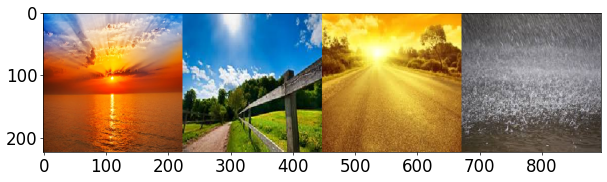

In [63]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})

class_names = {
  0: "Cloudy",
  1: "Rain",
  2: "Shine",
  3: "Sunrise"
}

images, targets = next(train_flow)

print([class_names[x] for x in np.argmax(targets[:4], axis=1)])
plt.imshow(np.concatenate((images[0], images[1], images[2], images[3]), axis=1))
plt.show()

In [68]:
def get_model_1():
    model = Sequential()
    model.add(layers.Input(shape=(224,224,3)))
    model.add(layers.Flatten())     # dimension : 224 * 224 * 3
    # 곡선화 or 분류
    model.add(layers.Dense(4,activation="softmax"))
    return model

model_1 = get_model_1()
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │       602,116 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 602,116 (2.30 MB)

 Trainable params: 602,116 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
def get_model_2():
    model = Sequential()
    model.add(layers.Input(shape=(224,224,3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(4,activation="softmax"))
    return model

model_2 = get_model_2()
model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │     9,633,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,634,116 (36.75 MB)

 Trainable params: 9,634,116 (36.75 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
def get_model_3():
    model = Sequential()
    model.add(layers.Input(shape=(224,224,3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32,activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4,activation="softmax"))
    return model

model_3 = get_model_3()
model_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    19,267,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,278,180 (73.54 MB)

 Trainable params: 19,278,180 (73.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 398ms/step - accuracy: 0.7282 - loss: 10.9402 - val_accuracy: 0.7598 - val_loss: 12.0737
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 463ms/step - accuracy: 0.8030 - loss: 6.5626 - val_accuracy: 0.6480 - val_loss: 38.2841
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 363ms/step - accuracy: 0.7289 - loss: 13.2602 - val_accuracy: 0.7039 - val_loss: 18.8185
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 391ms/step - accuracy: 0.8106 - loss: 5.9096 - val_accuracy: 0.5140 - val_loss: 24.9517
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 572ms/step - accuracy: 0.6633 - loss: 19.2040 - val_accuracy: 0.6592 - val_loss: 35.4912
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 423ms/step - accuracy: 0.7062 - loss: 16.0122 - val_accuracy: 0.7654 - val_loss: 13.3376
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 452ms/step - accuracy: 0.8152 - loss: 6.0863 - val_accuracy: 0.6089 - val_loss: 21.6485
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 340ms/step - accuracy: 0.7276 - loss: 16.2194 - val_

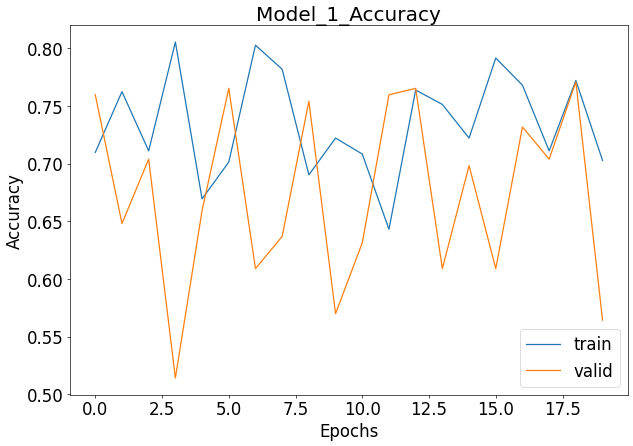

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 581ms/step - accuracy: 0.6903 - loss: 19.9546
Test loss: 22.75985146
Test accuracy: 65.93%


In [74]:
learning_rate = 0.01

# 학습 준비 단계(compile)
model_1.compile(
    optimizer=optimizers.SGD(learning_rate=learning_rate),  # 수정된 부분
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 학습 수행
history = model_1.fit(
    train_flow,     # subset
    epochs=20,
    validation_data=val_flow    # subset
)

# 정확도 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Model_1_Accuracy')
plt.legend(['train', 'valid'])
plt.show()

# 테스트
test_history = model_1.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 551ms/step - accuracy: 0.7065 - loss: 0.6561 - val_accuracy: 0.6369 - val_loss: 0.8263
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 391ms/step - accuracy: 0.7031 - loss: 0.6540 - val_accuracy: 0.6480 - val_loss: 0.7865
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 578ms/step - accuracy: 0.7412 - loss: 0.5876 - val_accuracy: 0.5642 - val_loss: 1.1083
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 493ms/step - accuracy: 0.6929 - loss: 0.6113 - val_accuracy: 0.6536 - val_loss: 0.8079
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 501ms/step - accuracy: 0.6966 - loss: 0.6516 - val_accuracy: 0.6704 - val_loss: 0.7702
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 398ms/step - accuracy: 0.6966 - loss: 0.6500 - val_accuracy: 0.6592 - val_loss: 0.8070
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 427ms/step - accuracy: 0.7173 - loss: 0.6011 - val_accuracy: 0.6480 - val_loss: 0.7710
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 455ms/step - accuracy: 0.7045 - loss: 0.6081 - val_accuracy: 0.

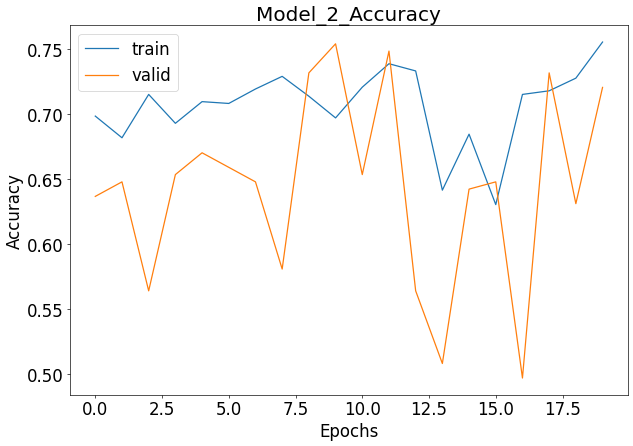

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 401ms/step - accuracy: 0.7189 - loss: 0.7258
Test loss: 0.62098926
Test accuracy: 79.20%


In [73]:
learning_rate = 0.01

# 학습 준비 단계(compile)
model_2.compile(
    optimizer=optimizers.SGD(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# 학습 수행
history = model_2.fit(
    train_flow,
    epochs=20,
    validation_data=val_flow
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Model_2_Accuracy')
plt.legend(['train', 'valid'])
plt.show()

# 학습된 모델 테스트
test_history = model_2.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 499ms/step - accuracy: 0.2456 - loss: 4.0344 - val_accuracy: 0.3073 - val_loss: 1.3772
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 541ms/step - accuracy: 0.3032 - loss: 1.3651 - val_accuracy: 0.3352 - val_loss: 1.3729
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 451ms/step - accuracy: 0.2540 - loss: 1.3820 - val_accuracy: 0.3128 - val_loss: 1.3696
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 599ms/step - accuracy: 0.2691 - loss: 1.3616 - val_accuracy: 0.3128 - val_loss: 1.3091
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 536ms/step - accuracy: 0.2748 - loss: 1.3600 - val_accuracy: 0.3184 - val_loss: 1.3236
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 444ms/step - accuracy: 0.2376 - loss: 1.3489 - val_accuracy: 0.3184 - val_loss: 1.2445
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 473ms/step - accuracy: 0.2838 - loss: 1.3731 - val_accuracy: 0.3184 - val_loss: 1.3778
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 457ms/step - accuracy: 0.3141 - loss: 1.3712 - val_accuracy: 

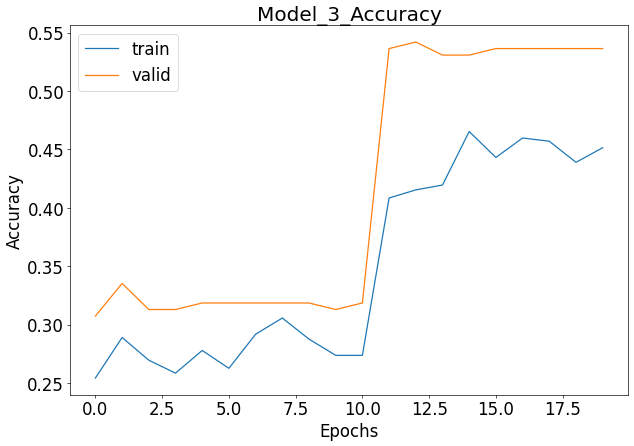

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 556ms/step - accuracy: 0.6020 - loss: 1.1678
Test loss: 0.99999714
Test accuracy: 57.52%


In [75]:
# model_3
learning_rate = 0.01

# 학습 준비 단계(compile)
model_3.compile(
    optimizer=optimizers.SGD(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# 학습 수행
history = model_3.fit(
    train_flow,
    epochs=20,
    validation_data=val_flow
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Model_3_Accuracy')
plt.legend(['train', 'valid'])
plt.show()

# 학습된 모델 테스트
test_history = model_3.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")